# Universidad Nacional Autónoma de México

#Segundo Examen Parcial - Robótica

##Semestre 2025-2

##Elaborado por:


*   Figueroa Navarro Jürgen Alejandro
*   Ortega Mejía Rodrigo
*   Rabadán Granados Jesús Sebastián
*   Santillán Sosa Gerardo




##Resumen

Este documento presenta el desarrollo del segundo parcial de la asignatura de robótica, enfocado en la simulación de un robot manipulador serial de cuatro grados de libertad (4R) utilizando ROS 2. A lo largo del trabajo se detallan los pasos seguidos para la creación de la descripción URDF del robot, su integración en un entorno de simulación y su visualización en RViz. También se abordan aspectos como la definición de la cinemática directa e inversa, el modelado del movimiento y el uso de herramientas como xacro, joint_state_publisher y robot_state_publisher. El documento refleja un enfoque práctico y técnico para lograr una simulación funcional, así como la superación de desafíos técnicos durante el proceso.

##Índice

*   Introducción

*   Hipótesis

*   Objetivo

*   Descripción del Problema

*   Propuesta de Solución

*   Experimentos o Simulaciones

*   Resultados

*   Conclusiones

# Introducción
En el ámbito de la automatización industrial y la robótica, los manipuladores tipo serial han adquirido gran relevancia por su capacidad de ejecutar tareas precisas en entornos tridimensionales. Uno de los casos más representativos es el robot 4R, compuesto por cuatro grados de libertad rotacionales, cuya configuración permite una amplia gama de movimientos dentro del espacio de trabajo.



El presente proyecto tiene como finalidad el desarrollo completo de un robot serial 4R, abarcando desde su modelado tridimensional hasta su simulación en entornos de visualización y control. Para ello, se integran distintas herramientas del ecosistema ROS 2, como el formato URDF para describir su estructura, RViz2 para la visualización y MoveIt junto con Gazebo para la planificación y ejecución de trayectorias. Además, se abordarán los modelos matemáticos de la cinemática directa e inversa, fundamentales para el control y la simulación del robot.

Este trabajo se desarrolla como parte del segundo parcial de la asignatura, y está orientado a consolidar los conocimientos sobre modelado, simulación y control de manipuladores seriales, aplicados a un caso práctico.

# Hipótesis
Existe una trayectoria en el espacio de trabajo del robot que nos permita llegar de un punto P1 a un Punto P2 que permita a un robot scara mantener su capacidad de mover un objeto de manera adecuada.

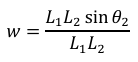


# Objetivo
Diseñar una trayectoria que permita a un robot scara mover un objeto de un punto P1 a un Punto P2, manteniendo su índice de manipulabilidad W dentro de un rango.

image.png

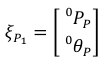

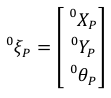

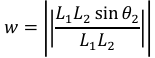


#Descripción del Problema
El presente proyecto tiene como objetivo diseñar una trayectoria que permita a un robot tipo SCARA, con cuatro grados de libertad (4R), trasladar un objeto desde un punto de inicio 𝑃1 hasta un punto de destino 𝑃2. Durante este desplazamiento, es fundamental que el robot mantenga un índice de manipulabilidad 𝑊 dentro de un rango adecuado, con el fin de asegurar un control preciso y eficiente de su movimiento. Para lograrlo, se emplearán herramientas de modelado y simulación como Fusion 360 para el diseño tridimensional del robot, ROS 2 para la integración y comunicación entre nodos, y RViz y Gazebo como entornos de visualización y simulación. El proyecto requiere el desarrollo tanto de modelos matemáticos que describan la cinemática del robot como de su implementación y validación en un entorno virtual.

# Propuesta de Solución
Para resolver el problema planteado, se propone desarrollar un modelo completo de un robot manipulador tipo 4R en el espacio tridimensional. El primer paso consistirá en plantear el modelo del robot mediante la creación de su archivo URDF, el cual se generará a partir del diseño realizado en Fusion 360 y se incluirá en un paquete ROS 2 denominado <paquete>_description. Este archivo contendrá la descripción estructural del robot, incluyendo sus enlaces, articulaciones y geometrías visuales mediante archivos STL.

A continuación, se procederá a desarrollar los modelos matemáticos que describen la cinemática directa, tanto para la postura como para las velocidades, con el objetivo de calcular la posición del efector final y su velocidad lineal a partir de los valores articulares. Posteriormente, se planteará y resolverá la cinemática inversa de la postura, lo que permitirá determinar los ángulos articulares requeridos para alcanzar una posición deseada del efector.

Una vez definidos los modelos cinemáticos, se buscará validar el modelo mediante una simulación en el entorno de Gazebo y RViz. Para ello, se desarrollará un segundo paquete, denominado <paquete>_bringup, en el cual se integrará el modelo del robot, se configurarán los nodos necesarios para su visualización y se implementará un control de trayectoria para las articulaciones. Esto permitirá simular su comportamiento ante diferentes trayectorias objetivo y analizar la precisión de la solución de la cinemática inversa.

# Planteamiento de un Robot 4R en el Espacio Mediante la Creación de su URDF

Para el desarrollo de nuestro prototipo de robot 4R, se utilizó el software de modelado paramétrico Fusion 360, herramienta ampliamente empleada en el diseño mecánico y la simulación de ensamblajes complejos. El modelo creado está compuesto por una base fija y tres eslabones móviles, conectados por uniones rotacionales, también conocidas en mecánica como articulaciones tipo revoluta.

En el ámbito de la robótica, estos componentes reciben el nombre de "links" (eslabones) y "joints" (articulaciones), respectivamente. Los links representan las partes rígidas del manipulador, mientras que los joints definen los grados de libertad y los tipos de movimiento permitidos entre ellos. En nuestro caso, el robot cuenta con cuatro grados de libertad rotacionales (de ahí su denominación como robot 4R), lo que permite una manipulación espacial flexible en el entorno tridimensional.

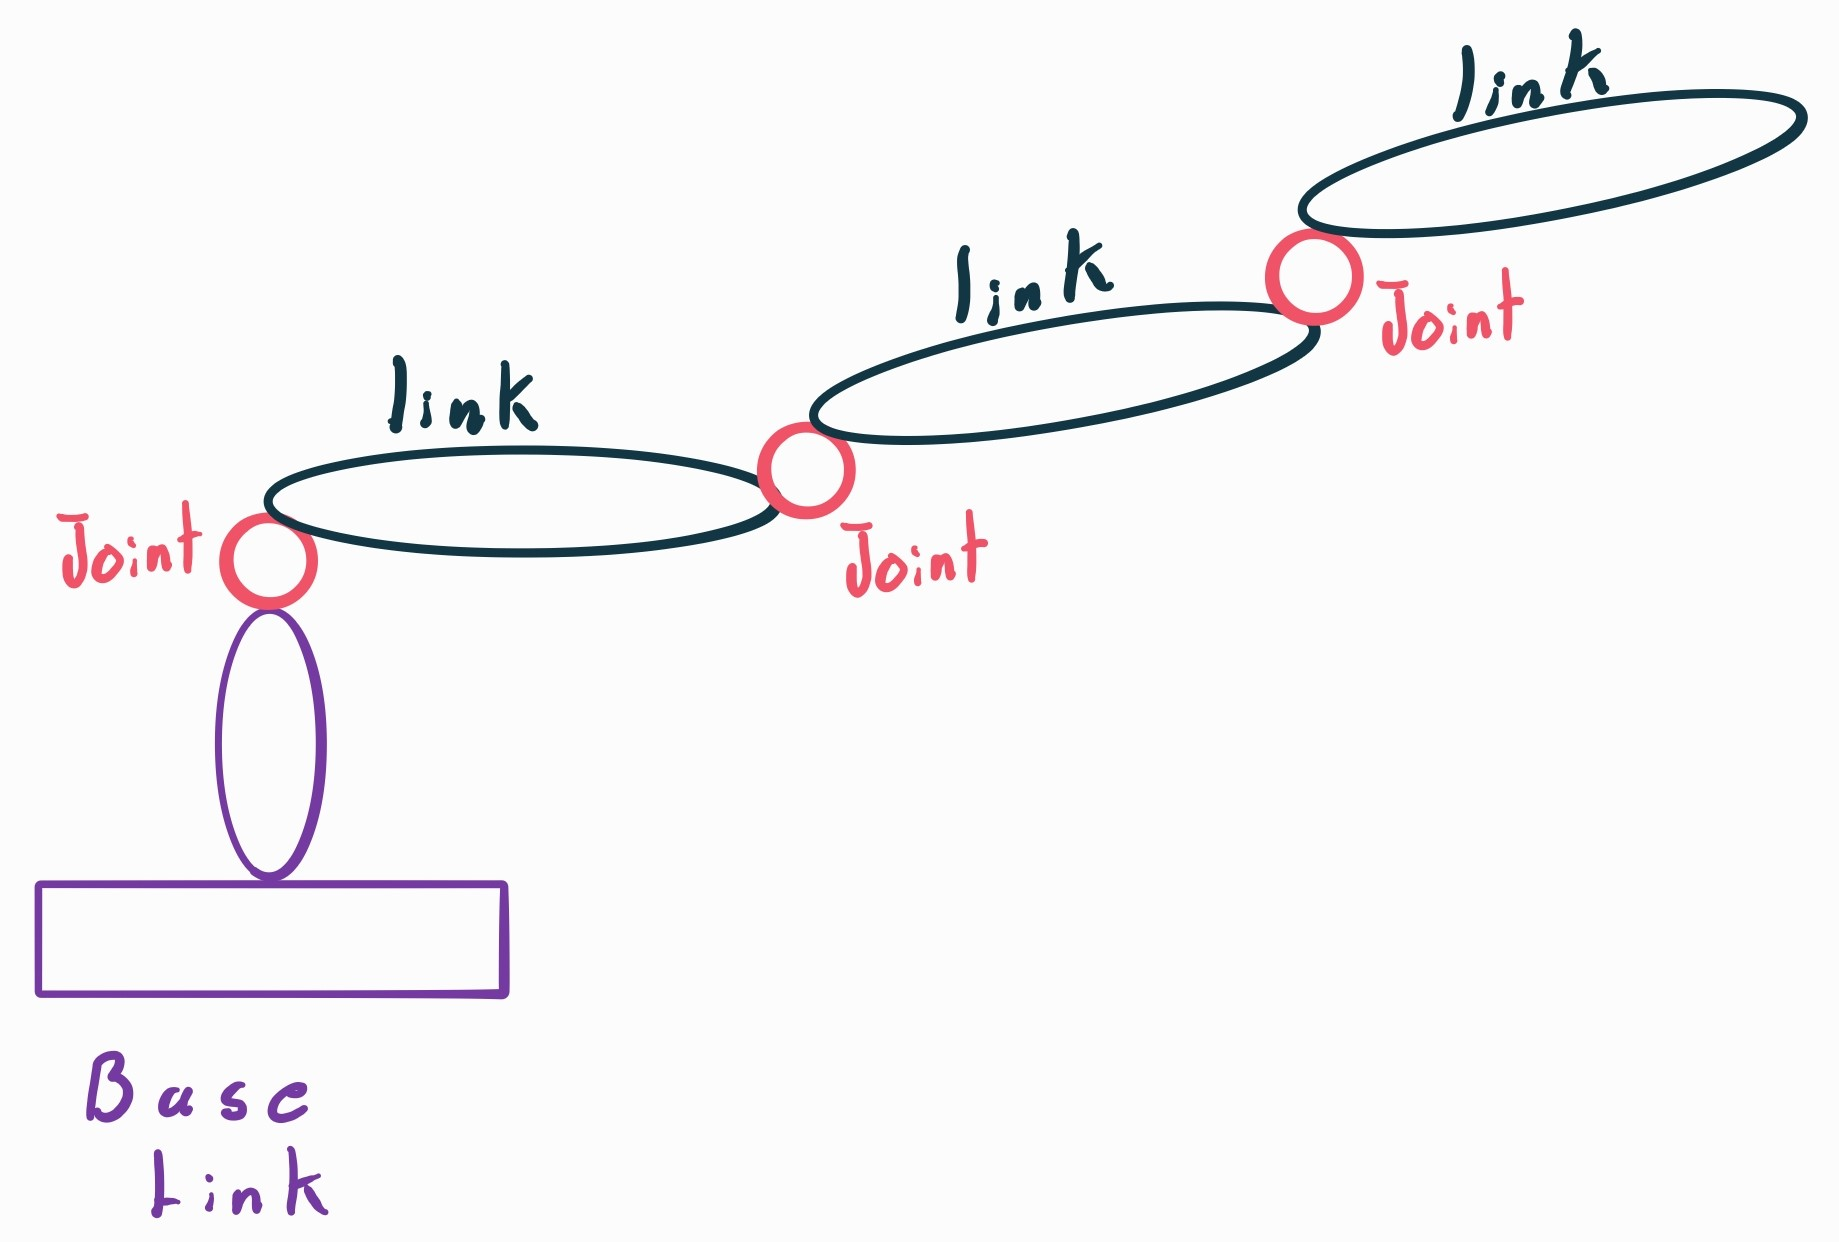




El modelo seleccionado para este proyecto toma como inspiración la arquitectura de un robot SCARA, el cual ha sido trabajado previamente en clase. Este tipo de manipulador se caracteriza por permitir movimientos principalmente en los ejes X e Y, siendo ideal para tareas de posicionamiento en un plano horizontal.

El diseño del robot fue realizado empleando operaciones básicas de modelado. Se comenzó con la creación de la base, mediante una operación de revolución sobre un boceto circular. A partir de esta base, se diseñaron los tres eslabones que conforman el brazo, empleando operaciones de ranura de centro a centro para definir sus formas principales, y posteriormente extrusiones para generar los pernos de unión entre eslabones.

Se mantuvo un orden lógico de construcción, asegurando que todas las piezas estuvieran alineadas paralelamente al eje X. Esta decisión es relevante, ya que al exportar el modelo a formato URDF, la orientación actual en el espacio CAD será tomada como la posición inicial del robot en los entornos de simulación como RViz2 o Gazebo.

Como parte del acabado visual y para fines de simulación, se asignaron colores y materiales distintos a cada componente. El material seleccionado fue acrílico (PMMA), ya que al definir propiedades físicas como masa, volumen y densidad, el URDF puede representar correctamente las características dinámicas y cinemáticas del robot durante su simulación.


Posteriormete, se utilizó la opción de “Crear componentes a partir de cuerpos”. Esta operación es esencial para que cada cuerpo del modelo sea tratado como un componente individual dentro del ensamblaje. Esta separación permite que, al exportar el conjunto a URDF, cada componente se reconozca como un link independiente dentro de la estructura jerárquica del robot, condición indispensable para una correcta interpretación en ROS 2.

Finalmente, se procedió a la etapa de ensamblaje del robot, donde se definieron las relaciones de movimiento entre los distintos componentes. Esta etapa es fundamental, ya que permite establecer el comportamiento cinemático del sistema, específicamente las rotaciones relativas entre eslabones que caracterizan al robot 4R.

Para ello, se utilizó la herramienta “Ensamblar” de Fusion 360, seleccionando la opción “Movimiento → Revolución”, lo cual habilita la simulación de movimientos rotacionales entre componentes. Durante este proceso, se seleccionaron cuidadosamente los ejes y superficies de contacto correspondientes a cada par de piezas, respetando el orden jerárquico de la estructura (de base hacia efector). Esto permitió verificar visualmente que el robot realizara los movimientos esperados en los ejes X e Y, confirmando la funcionalidad del diseño antes de su exportación a URDF.

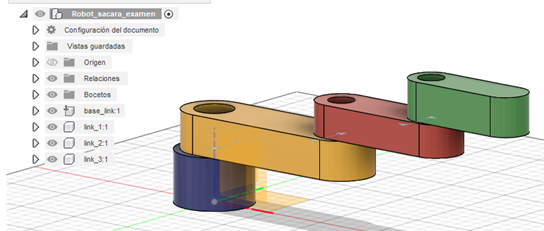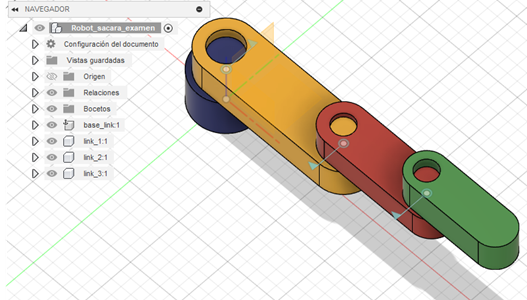




# Exportación del Modelo a Formato URDF
Una vez concluido el diseño mecánico del robot 4R en Fusion 360, el siguiente paso fue exportar el modelo al formato URDF (Unified Robot Description Format), el cual es el estándar utilizado en ROS para describir robots en términos de eslabones, articulaciones, geometría, masa y propiedades inerciales.

Fusion 360, por defecto, no cuenta con soporte nativo para exportar directamente a URDF, por lo que fue necesario descargar un complemento adicional desarrollado por la comunidad, específicamente orientado a integrarse con el ecosistema de ROS.

Para llevar a cabo esta tarea, se utilizó el complemento llamado ACDC4Robot (Autodesk Connector for Descriptive Components for Robots), el cual está disponible gratuitamente en la plataforma Autodesk App Store. Este complemento fue diseñado para facilitar la creación de archivos URDF a partir de modelos 3D construidos en Fusion 360.
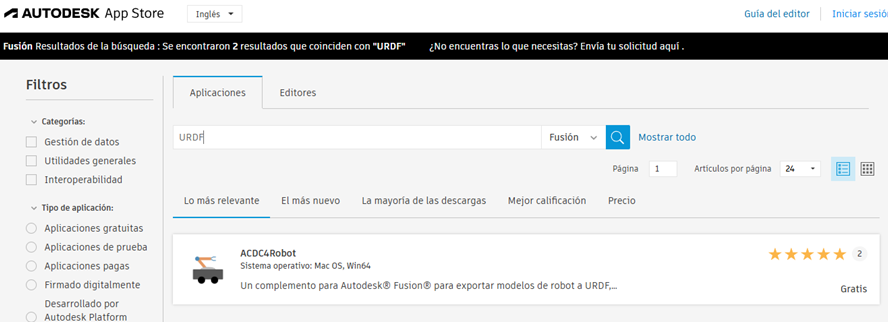

Una vez descargado e instalado el complemento, este aparece como una opción en el menú lateral de Fusion, bajo el nombre “ACDC for Robot Exporter”. Este plugin permite asignar de forma interactiva los roles de links y joints, definir los ejes de rotación de cada articulación, configurar las propiedades físicas (masa, centro de masa, inercia) y seleccionar las mallas que serán exportadas para visualización y colisión.

Al terminar el diseño y el ensamblaje del robot, se siguieron los siguientes pasos para generar el URDF:

1. Activación del plugin desde Fusion 360 mediante el panel “ACDC Exporter”.

2. Asignación de roles a cada componente: se definieron los links (eslabones) y se establecieron los joints (articulaciones), especificando si eran de tipo revolute, fixed, etc.

3. Configuración de los ejes de rotación, asegurando que cada joint tuviera correctamente orientado su eje (por ejemplo, xyz="0 0 1" para rotaciones sobre Z).

4. Especificación de las propiedades físicas de cada componente, las cuales se importaron automáticamente si los materiales habían sido previamente definidos en Fusion 360 (en este caso, acrílico/PMMA).

5. Exportación del URDF y los archivos de malla (.stl), generando una carpeta que incluye:

 - El archivo Robot_scara_examen.urdf
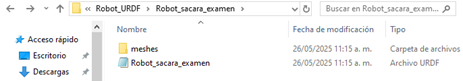
 - Una subcarpeta meshes/ con todos los archivos STL exportados
 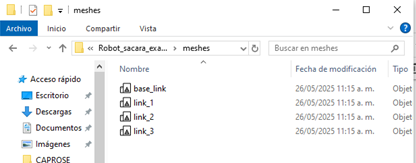

 - Archivos de configuración de propiedades

El archivo URDF (Unified Robot Description Format) es un componente fundamental en el desarrollo de robots dentro del entorno ROS 2, ya que permite describir de forma estructurada la geometría, cinemática, dinámica y relaciones jerárquicas de los distintos elementos que componen un robot. Este archivo define cada uno de los eslabones (links) y articulaciones (joints), especificando su forma visual, propiedades físicas, conexiones entre componentes y limitaciones de movimiento. Gracias a esta estructura, ROS puede interpretar el robot como un sistema articulado y utilizarlo en herramientas como RViz para visualización, Gazebo para simulación física, y MoveIt para planificación de trayectorias.
En este caso, el URDF generado describe un robot tipo 4R, compuesto por una base fija y tres eslabones unidos por articulaciones rotacionales, con sus respectivas mallas STL y propiedades físicas exportadas desde Fusion 360.
A continuación, se comento todo el código para identificar cada parte del archivo URDF y comprender mejor su estructura.



```
<!-- Se declara el inicio del archivo URDF con el nombre del robot -->
<robot name="Robot_sacara_examen">

    <!-- ===== LINK: base_link ===== -->
    <!-- Representa la base fija del robot -->
    <link name="base_link">
        <!-- Propiedades físicas: masa, centro de masa e inercia -->
        <inertial>
            <origin xyz="4.4676e-18 4.4676e-18 0.0233" rpy="0.0 0.0 0.0" />
            <mass value="0.15115" />
            <inertia ixx="6.31e-05" iyy="6.31e-05" izz="6.24e-05"
                     ixy="3.01e-36" iyz="2.25e-21" ixz="2.25e-21" />
        </inertial>

        <!-- Visualización del link en RViz -->
        <visual name="base_link_visual">
            <origin xyz="0.0 0.0 0.0" rpy="0.0 0.0 0.0" />
            <geometry>
                <!-- Malla STL escalada a metros -->
                <mesh filename="meshes/base_link.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </visual>

        <!-- Geometría de colisión para simuladores físicos -->
        <collision name="base_link_collision">
            <origin xyz="0.0 0.0 0.0" rpy="0.0 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/base_link.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </collision>
    </link>

    <!-- ===== LINK: link_1 ===== -->
    <!-- Primer eslabón móvil conectado a la base -->
    <link name="link_1">
        <inertial>
            <origin xyz="0.0674 0.0 0.0157" rpy="0.0 0.0 0.0" />
            <mass value="0.26609" />
            <inertia ixx="7.84e-05" iyy="5.53e-04" izz="5.83e-04"
                     ixy="0.0" iyz="1.35e-20" ixz="-9.82e-06" />
        </inertial>
        <visual name="link_1_visual">
            <origin xyz="0.0 0.0 -0.04" rpy="0.0 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/link_1.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </visual>
        <collision name="link_1_collision">
            <origin xyz="0.0 0.0 -0.04" rpy="0.0 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/link_1.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </collision>
    </link>

    <!-- ===== LINK: link_2 ===== -->
    <!-- Segundo eslabón del brazo -->
    <link name="link_2">
        <inertial>
            <origin xyz="0.0500 0.0 -0.0137" rpy="0.0 0.0 0.0" />
            <mass value="0.14238" />
            <inertia ixx="2.88e-05" iyy="1.80e-04" izz="1.87e-04"
                     ixy="0.0" iyz="1.35e-20" ixz="5.87e-06" />
        </inertial>
        <visual name="link_2_visual">
            <!-- Esta rotación invierte el STL para alinearlo -->
            <origin xyz="-0.12 0.0 0.07" rpy="3.1416 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/link_2.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </visual>
        <collision name="link_2_collision">
            <origin xyz="-0.12 0.0 0.07" rpy="3.1416 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/link_2.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </collision>
    </link>

    <!-- ===== LINK: link_3 ===== -->
    <!-- Tercer eslabón, usualmente el más distal -->
    <link name="link_3">
        <inertial>
            <origin xyz="0.0385 0.0 -0.015" rpy="0.0 0.0 0.0" />
            <mass value="0.11041" />
            <inertia ixx="1.95e-05" iyy="9.10e-05" izz="9.40e-05"
                     ixy="2.58e-20" iyz="-3.38e-20" ixz="0.0" />
        </inertial>
        <visual name="link_3_visual">
            <origin xyz="-0.205 0.0 0.095" rpy="3.1416 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/link_3.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </visual>
        <collision name="link_3_collision">
            <origin xyz="-0.205 0.0 0.095" rpy="3.1416 0.0 0.0" />
            <geometry>
                <mesh filename="meshes/link_3.stl" scale="0.001 0.001 0.001" />
            </geometry>
        </collision>
    </link>

    <!-- ===== JOINT 1: base_link → link_1 ===== -->
    <!-- Articulación rotacional entre base y primer eslabón -->
    <joint name="base_link_Revolución-1" type="continuous">
        <origin xyz="0.0 0.0 0.04" rpy="0.0 0.0 0.0" />
        <parent link="base_link" />
        <child link="link_1" />
        <axis xyz="0.0 0.0 1.0" />
    </joint>

    <!-- ===== JOINT 2: link_1 → link_2 ===== -->
    <joint name="link_1_Revolución-2" type="continuous">
        <origin xyz="0.12 0.0 0.03" rpy="3.1416 0.0 0.0" />
        <parent link="link_1" />
        <child link="link_2" />
        <axis xyz="0.0 0.0 1.0" />
    </joint>

    <!-- ===== JOINT 3: link_2 → link_3 ===== -->
    <joint name="link_2_Revolución-3" type="continuous">
        <origin xyz="0.085 0.0 -0.025" rpy="0.0 0.0 0.0" />
        <parent link="link_2" />
        <child link="link_3" />
        <axis xyz="0.0 0.0 1.0" />
    </joint>

</robot>


```



# Cinemática Directa
La cinemática directa consiste en obtener la posición y orientación del efector final (último eslabón) a partir de los ángulos de las articulaciones (θ₁, θ₂, θ₃, θ₄) y la geometría del robot (longitudes de eslabones).

En este caso, vamos a obtener una matriz de transformación 4x4, que relaciona el marco base con el marco del efector final.

# Tabla DH
La tabla DH, o tabla de Denavit-Hartenberg, es una herramienta estandarizada que se utiliza en robótica para describir la configuración espacial de un manipulador. Esta convención, introducida por Jacques Denavit y Richard Hartenberg, permite representar de forma sistemática y simplificada la posición y orientación de cada eslabón del robot con respecto al anterior, facilitando el análisis de su cinemática.

En este proyecto, la tabla DH nos permitira representar de forma compacta la estructura del robot 4R, expresando sus eslabones y articulaciones en términos de cuatro parámetros. Posteriormente, con esta información, se construyeron las matrices de transformación entre cada par de eslabones, lo que llevó a obtener la posición final del efector como función de los ángulos de las articulaciones.

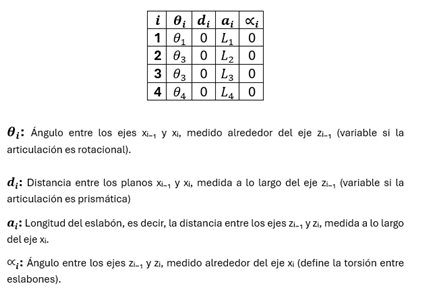



Posteriormente realizamos  matriz de transformación homogénea para cada articulación, la cual se construye a partir de los cuatro parámetros Denavit-Hartenberg (DH), los cuales permiten describir con precisión la relación geométrica entre eslabones consecutivos.

\[
T_i^{i-1} =
\begin{bmatrix}
\cos\theta_i & -\sin\theta_i \cos\alpha_i & \sin\theta_i \sin\alpha_i & a_i \cos\theta_i \\
\sin\theta_i & \cos\theta_i \cos\alpha_i & -\cos\theta_i \sin\alpha_i & a_i \sin\theta_i \\
0 & \sin\alpha_i & \cos\alpha_i & d_i \\
0 & 0 & 0 & 1
\end{bmatrix}
\]


En nuestro caso, αᵢ = 0 y dᵢ = 0  para todas las juntas. Entonces se simplifica:

\[
T_i^{i-1} =
\begin{bmatrix}
\cos\theta_i & -\sin\theta_i & 0 & a_i \cos\theta_i \\
\sin\theta_i & \cos\theta_i & 0 & a_i \sin\theta_i \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]


La matriz de transformación homogénea derivada de la convención de Denavit-Hartenberg representa de manera compacta tanto la rotación como la traslación entre dos marcos consecutivos de un robot articulado. En dicha matriz, los primeros tres renglones y columnas conforman una submatriz 3×3 que describe la rotación relativa entre los ejes coordenados de los eslabones, mientras que la cuarta columna contiene la posición o desplazamiento del sistema de coordenadas. La fila inferior constante [0 0 0 1] permite operar en el espacio de coordenadas homogéneas, facilitando la composición de transformaciones. Esta matriz considera tanto los ángulos de rotación introducidos por las articulaciones revolutas, como las traslaciones lineales determinadas por la geometría del eslabón. Además, permite que cada articulación tenga movimiento independiente y posibilita la concatenación sucesiva de matrices para obtener la posición y orientación final del efector, lo que constituye la base de la cinemática directa del robot.

A continuación, se construyen las matrices de transformación homogénea individuales correspondientes a cada una de las articulaciones del robot 4R, utilizando los parámetros Denavit-Hartenberg previamente definidos. Estas matrices representan las transformaciones de posición y orientación desde un marco de referencia a otro, considerando únicamente rotaciones en torno al eje Z y traslaciones a lo largo del eje X, ya que el robot opera en un plano. Como los parámetros ∝_i=0 y  d_i=0 para todas las articulaciones, las matrices se obtienen a partir de la forma simplificada de la fórmula DH.

T1: De base al primer eslabón

\[
T_1 =
\begin{bmatrix}
\cos\theta_1 & -\sin\theta_1 & 0 & L_1 \cos\theta_1 \\
\sin\theta_1 & \cos\theta_1 & 0 & L_1 \sin\theta_1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]

T2: de link 1 a link 2

\[
T_2 =
\begin{bmatrix}
\cos\theta_2 & -\sin\theta_2 & 0 & L_2 \cos\theta_2 \\
\sin\theta_2 & \cos\theta_2 & 0 & L_2 \sin\theta_2 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]

T3: de link 2 a link 3 (efector)

\[
T_3 =
\begin{bmatrix}
\cos\theta_3 & -\sin\theta_3 & 0 & L_3 \cos\theta_3 \\
\sin\theta_3 & \cos\theta_3 & 0 & L_3 \sin\theta_3 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]


Una vez definidas las matrices de transformación homogénea individuales para cada articulación del robot, el siguiente paso consiste en obtener la matriz de transformación total del efector final con respecto al marco base. Esta matriz se obtiene mediante la multiplicación secuencial de las matrices T_1,T_2   y T_3, lo que representa la composición de las transformaciones entre eslabones. El resultado es una única matriz T que describe la posición y orientación del extremo del robot en función de las variables articulares θ_1,θ_2,θ_3 y las longitudes L_1,L_2,L_3. Esta matriz es la base para analizar la postura del efector y, posteriormente, para derivar modelos de control y planificación de trayectoria.

                                   T = T_1 *T_2 * T_3


T =
\begin{bmatrix}
\cos(\theta_1 + \theta_2 + \theta_3) & -\sin(\theta_1 + \theta_2 + \theta_3) & 0 & x(\theta_1, \theta_2, \theta_3) \\
\sin(\theta_1 + \theta_2 + \theta_3) & \cos(\theta_1 + \theta_2 + \theta_3) & 0 & y(\theta_1, \theta_2, \theta_3) \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
\]


A partir de la matriz de transformación homogénea total 𝑇, es posible identificar directamente la posición del efector final respecto al marco base, la cual está contenida en los elementos de la columna cuarta de la matriz, específicamente en las entradas (1,4) y (2,4), que corresponden a las coordenadas 𝑥 y 𝑦 en el plano. Al desarrollar estas entradas utilizando la multiplicación secuencial de las matrices 𝑇_1, 𝑇_2 , 𝑇_3, se obtienen las expresiones que acumulan los efectos de cada articulación y longitud de eslabón sobre la posición final.

$$
x = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) + L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

Estas expresiones representan la trayectoria del extremo del robot en función de los ángulos articulares 𝜃_1, 𝜃_2, 𝜃_3 y las longitudes 𝐿_1, 𝐿_2, 𝐿_3, y constituyen el resultado directo del modelo de cinemática directa de la postura.


En el caso de este robot con tres articulaciones rotacionales en el plano (configuración tipo SCARA o planar), la orientación total del efector es simplemente la suma de los ángulos de cada una de las juntas que contribuyen con un giro alrededor del eje z. Esto se debe a que cada articulación añade un giro relativo que se acumula a lo largo de la cadena cinemática. La expresión ϕ=θ_1+θ_2+θ_3  se obtiene como resultado directo de la concatenación de transformaciones de rotación entre los eslabones, siguiendo la naturaleza secuencial del movimiento rotacional del robot. Esta orientación es fundamental para determinar completamente la postura del efector final en el plano.

Por lo tanto las ecuaciones que representantan la posición del efector son:



$$
x = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) + L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\phi = \theta_1 + \theta_2 + \theta_3
$$

# Cinemática Directa de las Velocidades
Una vez obtenida la cinemática directa de la postura, el siguiente paso es analizar cómo varía la posición del efector final en el tiempo, en función de las velocidades articulares. A esto se le conoce como cinemática directa de las velocidades, y permite calcular la velocidad lineal del extremo del robot a partir de las velocidades angulares de las articulaciones.
Para este análisis, se parte de las expresiones x(θ_1,θ_2,θ_3 )   y y(θ_1,θ_2,θ_3 ) obtenidas previamente, y se calculan sus derivadas parciales con respecto al tiempo utilizando la regla de la cadena. Esto nos lleva a determinar las componentes de la velocidad lineal del efector final, denotadas x ̇ y y ̇ en función de (θ_1 ) ̇,(θ_2 ) ̇,(θ_3 ) ̇  , es decir, las velocidades angulares articulares.
A continuación, procederemos a calcular estas derivadas para obtener el modelo de velocidades del robot 4R.



La ecuaciones que representantan la posición del efector



$$
x = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) + L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\phi = \theta_1 + \theta_2 + \theta_3
$$


Se procede a calcular el Jacobiano del robot, una matriz que relaciona directamente las velocidades articulares con las velocidades lineales y angulares del efector final. Este Jacobiano se obtiene mediante la derivación parcial de las funciones de posición x y y con respecto a cada una de las variables articulares θ_1,θ_2,θ_3, aplicando la regla de la cadena.


### Derivadas Parciales:

$$
\frac{\partial x}{\partial \theta_1} = -L_1 \sin(\theta_1) - L_2 \sin(\theta_1 + \theta_2) - L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\frac{\partial x}{\partial \theta_2} = -L_2 \sin(\theta_1 + \theta_2) - L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\frac{\partial x}{\partial \theta_3} = -L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\frac{\partial y}{\partial \theta_1} = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
\frac{\partial y}{\partial \theta_2} = L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
\frac{\partial y}{\partial \theta_3} = L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

---

### Derivadas de \(∅):

$$
\frac{\partial \phi}{\partial \theta_1} = 1, \quad
\frac{\partial \phi}{\partial \theta_2} = 1, \quad
\frac{\partial \phi}{\partial \theta_3} = 1
$$


A continuación, obtenemos la matriz Jacobiana J(θ), la cual relaciona directamente las velocidades articulares (θ_i ) ̇ con las velocidades lineales y angulares del efector final. Esta matriz se deriva tomando las derivadas parciales de las funciones de posición x(θ_1,θ_2,θ_3), y(θ_1,θ_2,θ_3) y orientación ∅(θ_1,θ_2,θ_3) con respecto a cada una de las variables articulares. Se aplica la regla de la cadena y simplificaciones trigonométricas como θ_12=θ_1+ θ_2 y θ_123=θ_1+ θ_2+θ_3 . Esto permite construir una matriz de tamaño 3x3 que será utilizada para el análisis de velocidades y más adelante para el control del robot.

La matriz Jacobiana es:

$$
J(\theta) =
\begin{bmatrix}
\frac{\partial x}{\partial \theta_1} & \frac{\partial x}{\partial \theta_2} & \frac{\partial x}{\partial \theta_3} \\
\frac{\partial y}{\partial \theta_1} & \frac{\partial y}{\partial \theta_2} & \frac{\partial y}{\partial \theta_3} \\
\frac{\partial \phi}{\partial \theta_1} & \frac{\partial \phi}{\partial \theta_2} & \frac{\partial \phi}{\partial \theta_3}
\end{bmatrix}
$$

Que explícitamente es:

$$
J(\theta) =
\begin{bmatrix}
-L_1 \sin(\theta_1) - L_2 \sin(\theta_{12}) - L_3 \sin(\theta_{123}) &
-L_2 \sin(\theta_{12}) - L_3 \sin(\theta_{123}) &
-L_3 \sin(\theta_{123}) \\
L_1 \cos(\theta_1) + L_2 \cos(\theta_{12}) + L_3 \cos(\theta_{123}) &
L_2 \cos(\theta_{12}) + L_3 \cos(\theta_{123}) &
L_3 \cos(\theta_{123}) \\
1 & 1 & 1
\end{bmatrix}
$$

Donde:
$$
 \theta_{12} = \theta_1 + \theta_2
$$
$$
  \theta_{123} = \theta_1 + \theta_2 + \theta_3
$$
---


El modelo de velocidades queda expresado como:

$$
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi}
\end{bmatrix}
=
J(\theta)
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\dot{\theta}_3
\end{bmatrix}
$$


Los modelos obtenidos describen de manera precisa la relación entre las variables articulares del robot (ángulos de sus juntas) y la posición y orientación del efector final. El primer modelo (cinemática directa de la postura) nos permite calcular la posición (x, y) y orientación ϕ del efector en el espacio, a partir de los ángulos articulares. El segundo modelo (cinemática de velocidades) proporciona una herramienta fundamental para analizar y controlar la velocidad del efector en función de las velocidades articulares, mediante el Jacobiano J(θ). Estos modelos son la base para el análisis de movimiento, planificación de trayectorias y diseño de controladores en robótica.

# Cinemática Directa de la Postura:
$$
x = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) + L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\phi = \theta_1 + \theta_2 + \theta_3
$$

# Modelo Cinemático Directo de las Velocidades (Modelo Diferencial)
$$
\begin{bmatrix}
\dot{x} \\
\dot{y} \\
\dot{\phi}
\end{bmatrix}
=
J(\theta)
\begin{bmatrix}
\dot{\theta}_1 \\
\dot{\theta}_2 \\
\dot{\theta}_3
\end{bmatrix}
$$
# Matriz Jacobiana
$$
J(\theta) =
\begin{bmatrix}
-L_1 \sin(\theta_1) - L_2 \sin(\theta_{12}) - L_3 \sin(\theta_{123}) &
-L_2 \sin(\theta_{12}) - L_3 \sin(\theta_{123}) &
-L_3 \sin(\theta_{123}) \\
L_1 \cos(\theta_1) + L_2 \cos(\theta_{12}) + L_3 \cos(\theta_{123}) &
L_2 \cos(\theta_{12}) + L_3 \cos(\theta_{123}) &
L_3 \cos(\theta_{123}) \\
1 & 1 & 1
\end{bmatrix}
$$


# Cinemática Inversa de la Postura
En robótica, la cinemática inversa consiste en calcular los valores de las variables articulares (ángulos de las juntas) que permiten alcanzar una determinada posición y orientación del efector final. A diferencia de la cinemática directa, donde se parte de los ángulos para obtener la posición, en la cinemática inversa se hace el proceso contrario: se parte de una posición deseada y se busca determinar qué combinaciones de ángulos permiten alcanzarla. Este proceso es fundamental para tareas como planificación de trayectorias, control en espacio cartesiano y simulación de movimientos precisos en manipuladores. En este proyecto, aplicaremos la cinemática inversa al robot 4R diseñado, considerando que opera en un plano, y resolveremos su modelo utilizando relaciones trigonométricas.

Para poder resolver la cinemática inversa, es necesario partir del modelo de la cinemática directa de la postura, el cual fue obtenido previamente. Este modelo describe la posición (x, y) y la orientación ϕ del efector final en función de los ángulos articulares θ_1,θ_2,θ_3 y las longitudes de los eslabones L_1, L_2, L_3. Las expresiones son las siguientes:

$$
x = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\theta_1 + \theta_2 + \theta_3)
$$

$$
y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) + L_3 \sin(\theta_1 + \theta_2 + \theta_3)
$$

$$
\phi = \theta_1 + \theta_2 + \theta_3
$$


Estas ecuaciones constituyen la base sobre la cual realizaremos las sustituciones y manipulaciones necesarias para obtener una solución a la cinemática inversa. A partir de aquí, comenzaremos a reducir el sistema.

El sistema original involucra tres ecuaciones con tres incógnitas: θ_1, θ_2 y θ_3 . Sin embargo, la expresión para la orientación del efector final, ϕ=θ_1+θ_2+θ_3 , nos permite reducir el sistema a solo dos incógnitas. Al despejar θ_3 en función de θ_1, θ_2 y ϕ, podemos sustituir esta expresión en las ecuaciones de x y y, obteniendo un sistema con únicamente dos incógnitas: θ_1 y θ_2. Esta simplificación es crucial para poder aplicar trigonometría plana y resolver la cinemática inversa.

$$
\theta_3 = \phi - \theta_1 - \theta_2
$$

Sustituyendo en las ecuaciones de posición:

$$
x = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2) + L_3 \cos(\phi)
$$

$$
y = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2) + L_3 \sin(\phi)
$$

Observamos que L_3 Cos (ϕ) y L_3 Sin (ϕ) son constantes conocidas si se da la orientación deseada ϕ, por lo que podemos tratarlas como desplazamiento fijo del efector.

Después de sustituir θ_3 usando ϕ=θ_1+θ_2+θ_3, las ecuaciones de posición quedan expresadas únicamente en función de θ_1 y θ_2. Para facilitar el análisis, agrupamos los términos de x y y como la suma de dos componentes: una parte variable dependiente de θ_1 y θ_2, y una parte fija correspondiente al desplazamiento adicional generado por el eslabón 3 (dependiente de ϕ). Definimos estas nuevas variables:
$$
x' = x - L_3 \cos(\phi)
$$

$$
y' = y - L_3 \sin(\phi)
$$

Esto equivale a restar la contribución del último eslabón al movimiento total del efector, y nos permite tratar al sistema como si fuera un robot de dos eslabones. De esta forma, el problema se reduce a encontrar θ_1 y θ_2 que permitan alcanzar la posición (x', y') con el modelo clásico de un robot planar de 2 grados de libertad.

$$
x' = L_1 \cos(\theta_1) + L_2 \cos(\theta_1 + \theta_2)
$$

$$
y' = L_1 \sin(\theta_1) + L_2 \sin(\theta_1 + \theta_2)
$$


Una vez reducido el sistema a un robot de dos eslabones, con posición deseada (x', y'), el problema de cinemática inversa se convierte en encontrar los ángulos θ_1 y θ_2 que lleven la punta del segundo eslabón a esa posición. Para esto, se puede considerar un triángulo formado por los eslabones L_1, L_2 y el segmento que une el origen con el punto (x', y'), de longitud:
$$
r = \sqrt{x'^2 + y'^2}
$$

Luego se aplica la ley de cosenos para encontrar 𝜃_2, y posteriormente se usa trigonometría para obtener 𝜃_1.

$$
\cos(\theta_2) = \frac{r^2 - L_1^2 - L_2^2}{2 L_1 L_2}
$$

$$
\theta_2 = \arccos\left( \frac{r^2 - L_1^2 - L_2^2}{2 L_1 L_2} \right)
$$


$$
\beta = \arctan2(y', x')
$$


$$
\alpha = \arctan2\left(L_2 \sin(\theta_2), L_1 + L_2 \cos(\theta_2)\right)
$$


$$
\theta_1 = \beta - \alpha
$$

Con estos resultados, ya podemos encontrar θ_1 y θ_2 para cualquier punto alcanzable del plano. En el siguiente paso obtendremos θ_3.

Una vez determinados los ángulos 𝜃_1 y 𝜃_2 mediante las relaciones trigonométricas, el ángulo restante, 𝜃_3, puede calcularse directamente utilizando la ecuación de orientación total del efector, la cual es:

$$
\phi = \theta_1 + \theta_2 + \theta_3
$$

Despejando esta expresión, obtenemos que:

$$
\theta_3 = \phi - \theta_1 - \theta_2
$$

Este valor representa la contribución del último eslabón a la orientación total del efector final. Dado que ϕ es un valor deseado (entrada), y θ_1 , θ_2 ya fueron calculados, la obtención de θ_3 es directa. Con este resultado, el conjunto de soluciones (θ_1,θ_2,θ_3) satisface tanto la posición como la orientación del efector, cumpliendo así con la cinemática inversa de la postura del robot.

# Simulación en Matlab

Primero abrimos la carpeta generada por Fusion 360 y la colocamos en nuestros archivos de MatlLab. Una vez que lo cargamos en terminal colocamos el comando

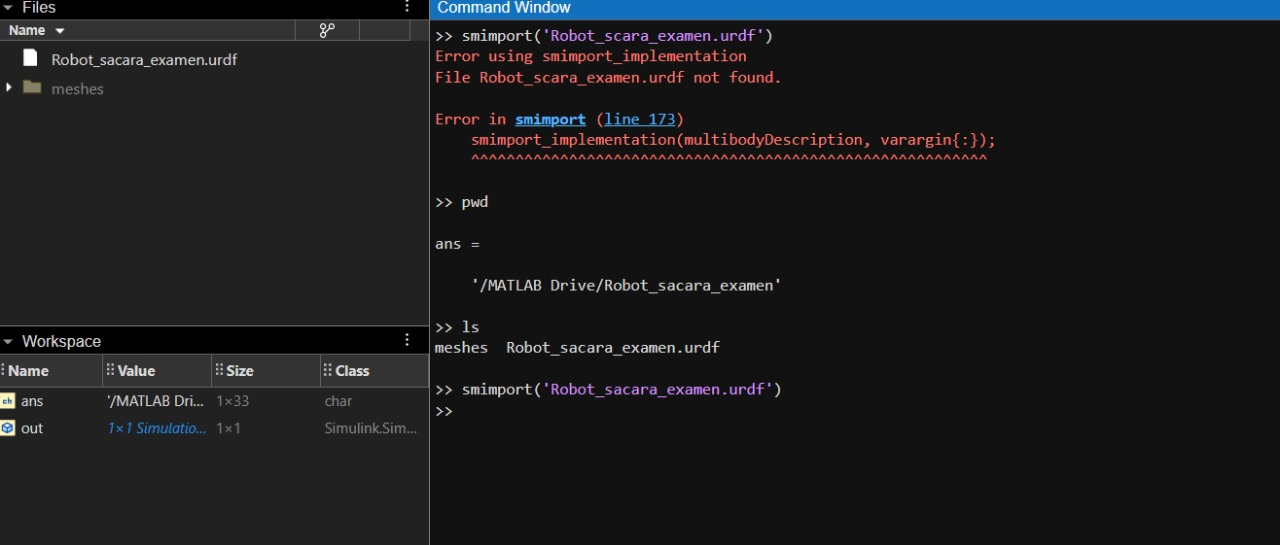


```
>> smimport('Robot_scara_examen.urdf')
```

Una vez aquí nos abre un conjunto de archivos en los cuales podemos ver nuestro robot y podremos colocar los meshes en las piezas para que todo funcione de manera correcta y nos damos cuenta que tenemos lo siguiente.



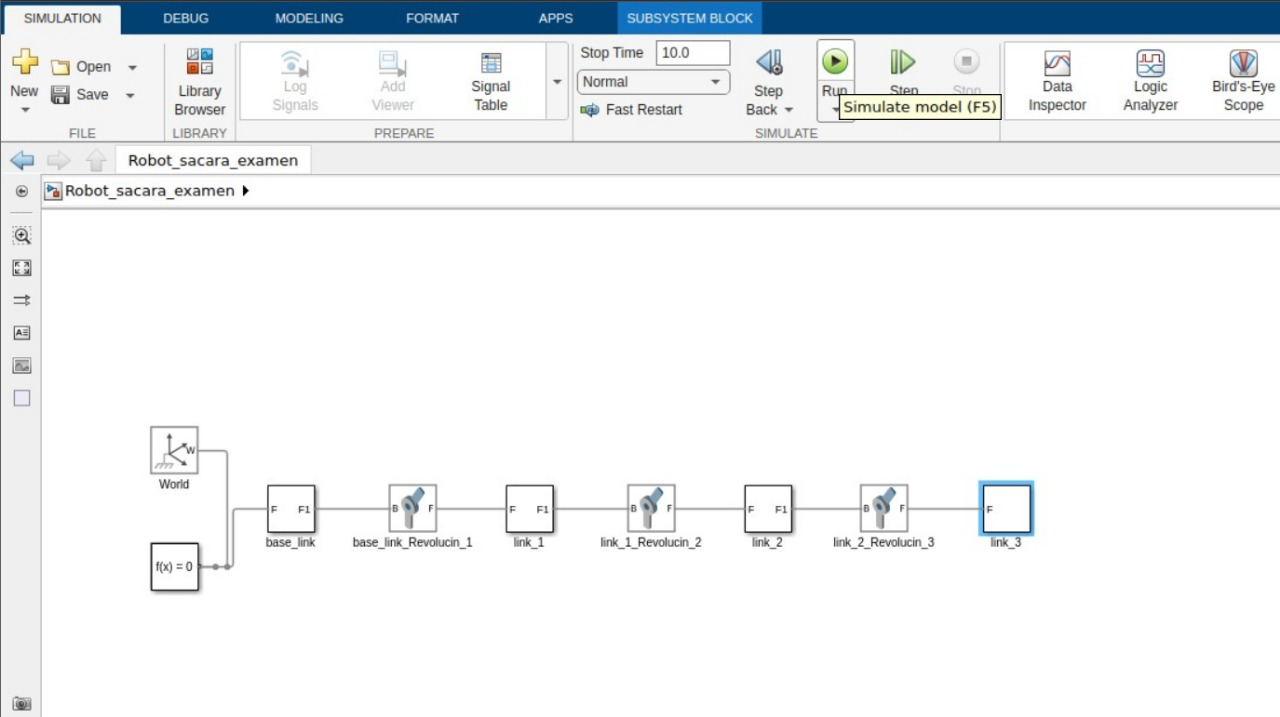

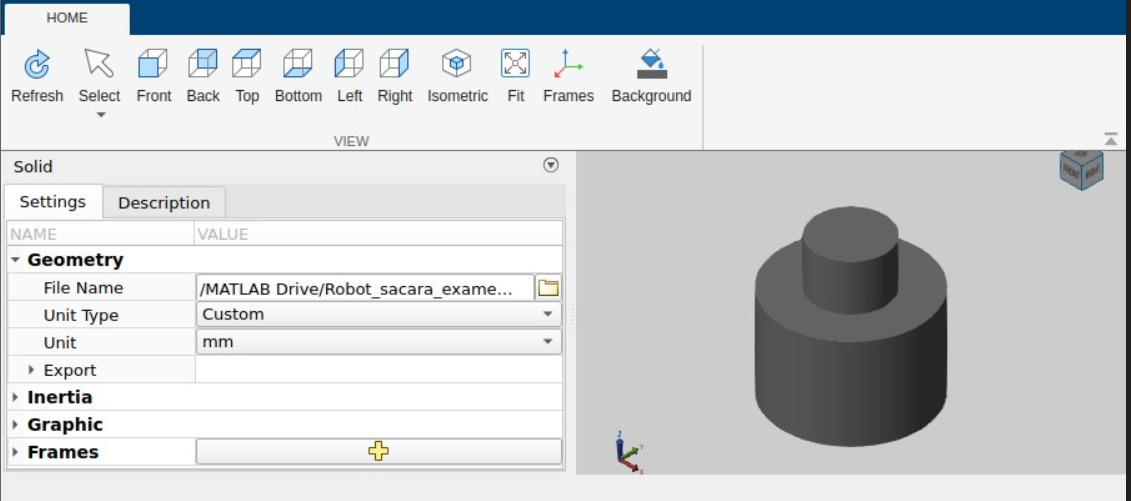

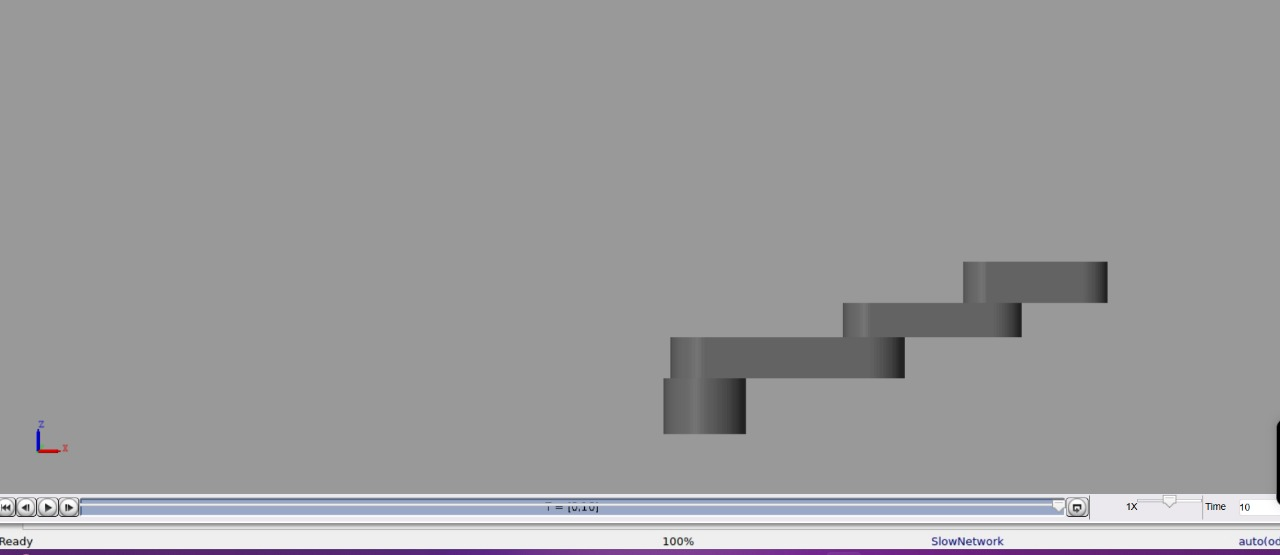

Las siguientes imágenes corresponden a la simulación de un robot serial de cuatro grados de libertad (4R) implementado en MATLAB utilizando el entorno de Simscape Multibody. Este modelo fue desarrollado con fines académicos para comprender el comportamiento dinámico de manipuladores robóticos.

La imagen 3 representa una vista tridimensional del robot durante la simulación.
En esta imagen se muestra el modelo del robot en el entorno gráfico de Simscape Multibody. Se puede observar claramente la estructura del manipulador conformada por eslabones cilíndricos conectados mediante articulaciones rotacionales. La orientación del robot indica que el sistema está siendo visualizado en el plano XZ, lo cual es típico en configuraciones tipo SCARA o manipuladores en 2D. La geometría del robot refleja adecuadamente la concatenación de eslabones que permiten el movimiento articulado.

La imagen 1 representa el diagrama del modelo en el entorno de Simulink.
 En esta imagen el sistema inicia con el bloque World, que define el marco de referencia global. A partir de este se conecta el base_link, seguido por una cadena de eslabones (link_1, link_2, link_3) unidos por articulaciones rotacionales (Revolucin_1, Revolucin_2, Revolucin_3). El esquema refleja una topología de robot serie, en la cual cada articulación permite un grado de libertad rotacional. Este diagrama es fundamental para simular la cinemática y dinámica del robot.

La imagen 2 representa la configuración geométrica de un eslabón.
Finalmente, en esta imagen se muestra la configuración de uno de los eslabones del robot dentro del entorno de Simscape. Se ha utilizado una geometría personalizada basada en un sólido cilíndrico escalonado. La unidad de medida definida es milímetros (mm), lo cual asegura que el modelo respete las proporciones reales. Esta representación geométrica permite definir con precisión tanto las propiedades físicas como la visualización del robot durante la simulación.

# **Simulacion en Rviz**

Para validar el modelo cinemático y estructural del robot 4R, se optó por implementar una simulación en ROS 2 (Robot Operating System), un conjunto de herramientas que facilita el desarrollo de software robótico modular y escalable. La simulación permite representar el comportamiento del robot en un entorno tridimensional, facilitando la verificación de su movilidad, articulaciones y geometría general sin necesidad de disponer de un prototipo físico.

El entorno de simulación elegido fue RViz2, una herramienta de visualización en ROS 2 que permite representar modelos URDF (Unified Robot Description Format), visualizar transformaciones entre marcos (TFs) y manipular de manera interactiva los estados articulares del robot mediante joint_state_publisher_gui. Además, se utilizó el paquete robot_state_publisher para transmitir las transformaciones correspondientes a las articulaciones del robot.

Este procedimiento es esencial para comprobar que el robot ha sido correctamente modelado, y que las relaciones entre sus eslabones y juntas permiten el movimiento deseado. A partir de este punto, se describe paso a paso el flujo seguido para realizar dicha simulación en ROS 2.

**Instalación de ROS 2 Humble en Ubuntu 22.04**

Paso 1: Configuración del Repositorio de ROS 2.
Primero, instale herramientas necesarias para la gestión de repositorios y claves GPG:



```
sudo apt update && sudo apt install -y curl gnupg lsb-release

```

A continuación, descargue la clave GPG del repositorio oficial de ROS:



```
sudo curl -sSL https://raw.githubusercontent.com/ros/rosdistro/master/ros.key -o /usr/share/keyrings/ros-archive-keyring.gpg

```

Agregue el repositorio de ROS 2 a la lista de fuentes de APT:



```
echo "deb [arch=$(dpkg --print-architecture) signed-by=/usr/share/keyrings/ros-archive-keyring.gpg] \
http://packages.ros.org/ros2/ubuntu $(lsb_release -cs) main" | \
sudo tee /etc/apt/sources.list.d/ros2.list > /dev/null

```









Paso 2: Instalación de ROS 2 Humble.
Actualice la lista de paquetes:



```
sudo apt update

```
Instale la versión completa de ROS 2 Humble, que incluye herramientas de desarrollo y simulación como RViz2 y Gazebo:



```
sudo apt install -y ros-humble-desktop

```

Este paquete incluye:

RViz2 – Visualización de datos sensoriales y estado del robot.

Gazebo – Simulador físico 3D.

Herramientas de desarrollo – Incluyen rqt, colcon, ros2doctor, entre otras.

Paquetes comunes de navegación y control.


Paso 3: Configura tu Ambiente.
Agrega ROS 2 a tu entorno:

Para que ROS 2 esté disponible automáticamente al abrir una terminal, añada la configuración al archivo .bashrc:
```
echo "source /opt/ros/humble/setup.bash" >> ~/.bashrc
source ~/.bashrc

```

Paso 4: Verificación de la Instalación.

Ejecute un ejemplo de publicación/suscripción con los nodos de demostración:

En la primera terminal, ejecute un nodo publicador (talker):



```
ros2 run demo_nodes_cpp talker

```

En una segunda terminal, ejecute un nodo suscriptor (listener):



```
ros2 run demo_nodes_cpp listener

```

Si ambos nodos se comunican correctamente, significa que la instalación fue exitosa.





Instalar paquete joint_state_publisher_gui
```
sudo apt update
sudo apt install ros-humble-joint-state-publisher-gui

```



##  Creando el Paquete de ROS2

Como primer paso técnico dentro del entorno ROS 2, se creó un paquete con el nombre robot_4r_description. Este paquete tiene como finalidad contener todos los archivos relacionados con la descripción del robot, tales como su archivo URDF, los modelos 3D de sus componentes, archivos de lanzamiento (launch) y configuraciones específicas de visualización.

Estructura básica.
Primero crea el paquete:



```
cd ~/ros2_ws/src
ros2 pkg create --build-type ament_python robot_4r_description

Este comando genera una estructura básica de carpetas bajo la convención de ROS 2, incluyendo archivos esenciales como:

- package.xml: donde se definen las dependencias, el autor y la licencia del paquete.

- setup.py: que permite configurar la instalación del paquete en ROS 2.

- Directorios robot_4r_description, launch, test, resource: necesarios para organizar los scripts, archivos de configuración, pruebas y recursos del paquete.

El uso de ament_python como tipo de compilación fue adecuado porque el paquete no requiere compilación de nodos en C++ y está orientado a la publicación de estados del robot y su visualización.

Este paso fue fundamental para encapsular la descripción del robot y habilitar su integración con herramientas de ROS 2 como rviz2, robot_state_publisher y joint_state_publisher_gui.
```
##**Estructura de la Carpeta**

Después de crear el paquete robot_4r_description, se procedió a organizar los archivos dentro de su estructura con el objetivo de que ROS 2 pudiera localizar correctamente cada recurso necesario para la simulación. La organización siguió la siguiente estructura de carpetas:

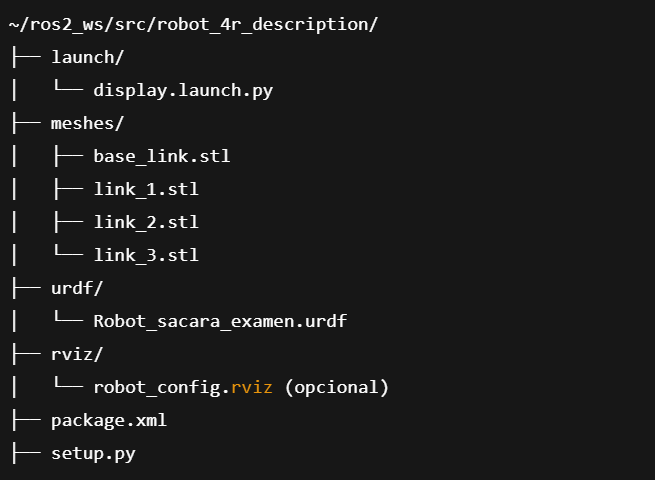

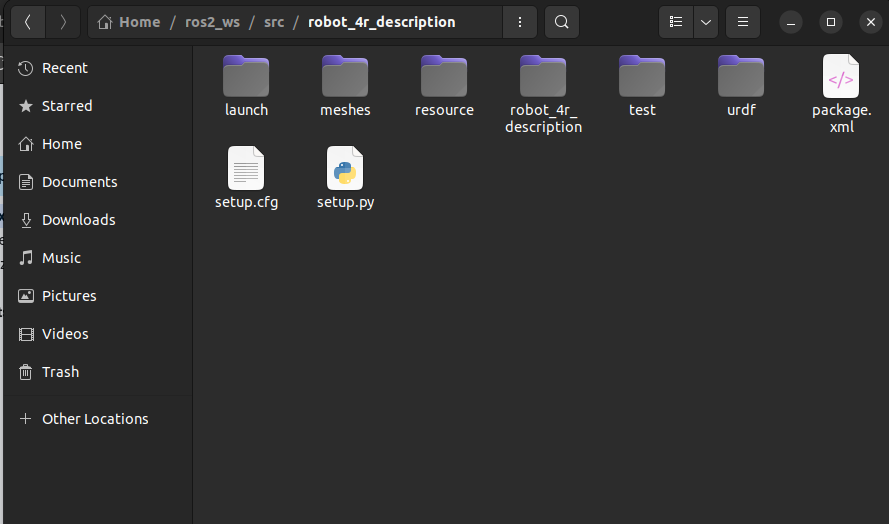

- launch/: Contiene los archivos necesarios para ejecutar el robot en RViz. display.launch.py es el archivo de lanzamiento principal que carga el modelo y lanza los nodos necesarios. robot_config.rviz guarda una configuración personalizada de visualización.

- meshes/: Carpeta donde se colocaron los modelos STL exportados desde Fusion 360. Estos modelos representan las piezas físicas del robot.

- urdf/: Contiene el archivo robot_4r.urdf, que describe la estructura y las propiedades del robot, incluyendo sus eslabones, uniones y geometría.

- Archivos raíz (package.xml, setup.py): Estos archivos definen el comportamiento del paquete y permiten su correcta instalación y uso dentro del entorno de ROS 2.

Esta organización es clave para garantizar que ROS 2 pueda localizar correctamente todos los archivos durante el lanzamiento del robot y su visualización en RViz.

# Modificación del Archivo URDF y Prueba de Validez
Una vez organizados los archivos del paquete, se procedió a revisar y modificar el archivo robot_4r.urdf ubicado en la carpeta urdf/. Este archivo, generado automáticamente por la exportación desde Fusion 360, contenía una estructura válida, pero era necesario hacer algunos ajustes para asegurar su compatibilidad con ROS 2 y su correcta visualización en RViz.

Modificaciones realizadas:

- Verificación de nombres de archivos y rutas: Se comprobó que las rutas de los archivos .stl dentro de las etiquetas <mesh filename="meshes/..."/> coincidieran con los archivos presentes en la carpeta meshes/.

- Revisión de articulaciones: Se revisaron los nombres y tipos de las articulaciones. Todas las juntas tipo revoluta fueron convertidas a tipo continuous para permitir movimiento sin restricción angular, ya que eran articulaciones de tipo rotacional.

- Chequeo de sintaxis XML: Se verificó que el archivo URDF estuviera correctamente formado, sin etiquetas abiertas o mal cerradas, ya que esto causaría errores durante el lanzamiento.

Copiar el Robot_sacara_examen.urdf a la carpeta urdf/

Copiar la carpeta meshes/ completa

Crear archivo display.launch.py (Crea este archivo en launch/display.launch.py:)



```
from launch import LaunchDescription
from launch_ros.actions import Node
from launch.actions import DeclareLaunchArgument
from launch.substitutions import LaunchConfiguration

def generate_launch_description():
    return LaunchDescription([
        DeclareLaunchArgument(
            name='use_sim_time',
            default_value='false',
            description='Use simulation clock'
        ),
        Node(
            package='robot_state_publisher',
            executable='robot_state_publisher',
            parameters=[{'use_sim_time': LaunchConfiguration('use_sim_time')}],
            arguments=['urdf/Robot_sacara_examen.urdf'],
            output='screen'
        ),
        Node(
            package='joint_state_publisher_gui',
            executable='joint_state_publisher_gui',
            name='joint_state_publisher_gui'
        ),
        Node(
            package='rviz2',
            executable='rviz2',
            name='rviz2',
            arguments=['-d', 'rviz/robot_config.rviz']
        )
    ])

```



Edita setup.py (Agrega esto al final de el setup.py:)



```
import os
from glob import glob

package_name = 'robot_4r_description'

data_files=[
    ('share/' + package_name, ['package.xml']),
    (os.path.join('share', package_name, 'launch'), glob('launch/*.launch.py')),
    (os.path.join('share', package_name, 'urdf'), glob('urdf/*.urdf')),
    (os.path.join('share', package_name, 'meshes'), glob('meshes/*.stl')),
    (os.path.join('share', package_name, 'rviz'), glob('rviz/*.rviz')),
],

```



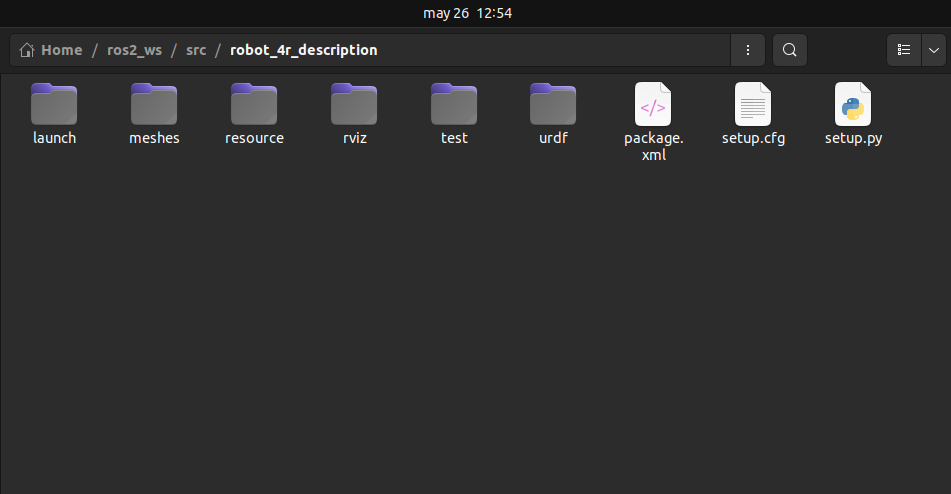

# Creación del Archivo de Lanzamiento para RViz (display.launch.py)
Con el archivo URDF ya validado, el siguiente paso consistió en crear un archivo de lanzamiento que permitiera visualizar el robot directamente en RViz 2 mediante una configuración estandarizada. Esto facilita la ejecución y depuración de simulaciones.
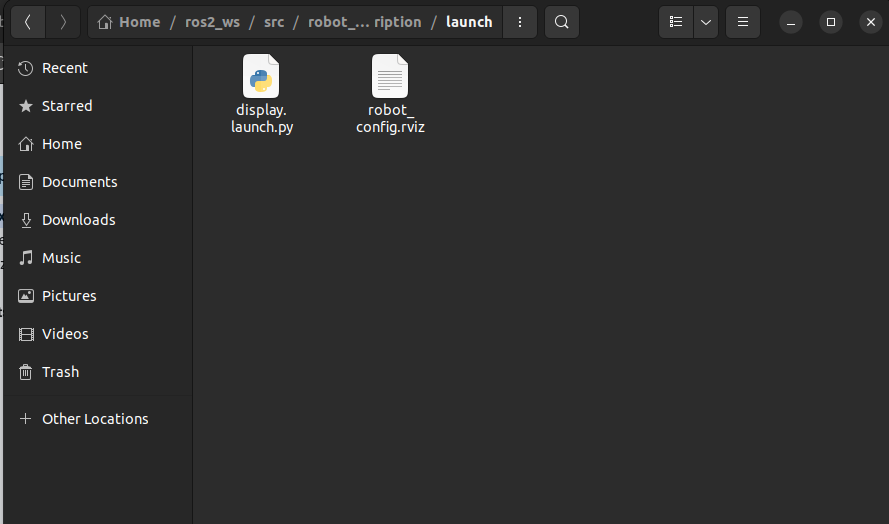


Contenido del archivo display.launch.py:

El archivo se creó dentro del directorio launch/ del paquete y contiene las siguientes instrucciones clave:

- Importación de funciones de launch y launch_ros para definir nodos.

- Uso de get_package_share_directory para obtener la ruta al paquete.

- Definición de nodos:

  - robot_state_publisher: Publica los estados del robot basados en el archivo URDF.

  - joint_state_publisher_gui: Permite modificar manualmente los ángulos de las articulaciones.

  - rviz2: Lanza la interfaz de RViz 2 y carga el archivo robot_config.rviz si está disponible.

## Código Base de display.launch.py:

In [ ]:
from ament_index_python.packages import get_package_share_directory
from launch import LaunchDescription
from launch_ros.actions import Node
from launch.actions import DeclareLaunchArgument
from launch.substitutions import LaunchConfiguration
import os

def generate_launch_description():
    return LaunchDescription([
        DeclareLaunchArgument(
            name='use_sim_time',
            default_value='false',
            description='Use simulation clock'
        ),
        Node(
            package='robot_state_publisher',
            executable='robot_state_publisher',
            parameters=[{'use_sim_time': LaunchConfiguration('use_sim_time')}],
            arguments=[os.path.join(
                get_package_share_directory('robot_4r_description'),
                'urdf/robot_4r.urdf')],
            output='screen'
        ),
        Node(
            package='joint_state_publisher_gui',
            executable='joint_state_publisher_gui',
            name='joint_state_publisher_gui'
        ),
        Node(
            package='rviz2',
            executable='rviz2',
            name='rviz2',
            arguments=['-d', os.path.join(
                get_package_share_directory('robot_4r_description'),
                'launch', 'robot_config.rviz')]
        )
    ])


Este archivo permite ejecutar el robot de manera inmediata en RViz usando:

- ros2 launch robot_4r_description display.launch.py

Esto lanza la interfaz gráfica, muestra el robot en pantalla (si todo está correctamente configurado) y permite modificar sus articulaciones en tiempo real para observar su comportamiento.

## Visualización y Prueba del Modelo en RViz
Una vez configurado el archivo display.launch.py, se procedió a verificar visualmente el correcto funcionamiento del modelo 3D del robot 4R mediante la herramienta RViz 2, que permite observar su estructura, articulaciones y movimientos en un entorno tridimensional.


1. Nos ubicamos en el directorio raíz del workspace:

           cd ~/ros2_ws

2. Compilamos el workspace para que ROS reconozca el nuevo paquete:

            colcon build

3. Cargamos las configuraciones necesarias en la terminal:


         source install/setup.bash

4. Lanzamos el robot en RViz mediante el archivo display.launch.py:

         ros2 launch robot_4r_description display.launch.py

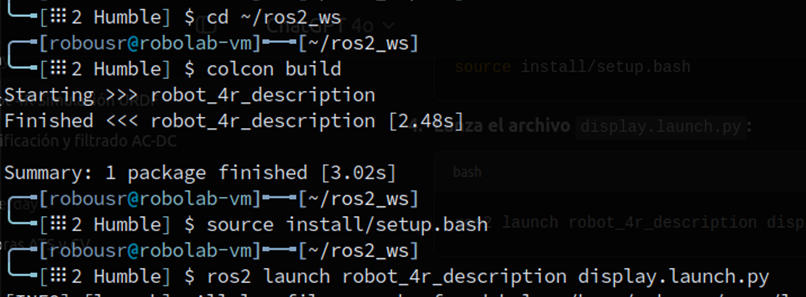

##**Resultado de la Simulación**

En esta etapa del procedimiento se esperaba visualizar el modelo completo del robot 4R utilizando RViz2, luego de haber configurado y lanzado correctamente el archivo display.launch.py. A pesar de que el archivo URDF fue verificado exitosamente mediante el comando check_urdf, y que el lanzador ejecutó sin errores aparentes (inicializando tanto joint_state_publisher_gui como robot_state_publisher), el modelo del robot no se representó gráficamente en la vista 3D de RViz. Se pudo verificar que los enlaces base_link, link_1, link_2 y link_3 fueron reconocidos correctamente por RViz, ya que estaban disponibles en el campo Fixed Frame y se reportaron como válidos en el RobotModel. Sin embargo, el modelo visual no se mostró.

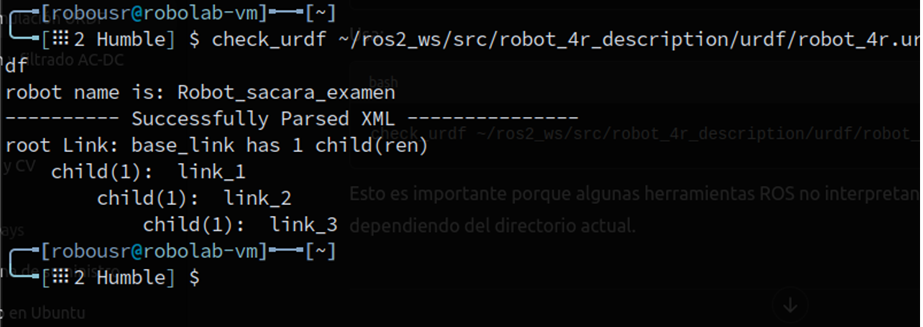


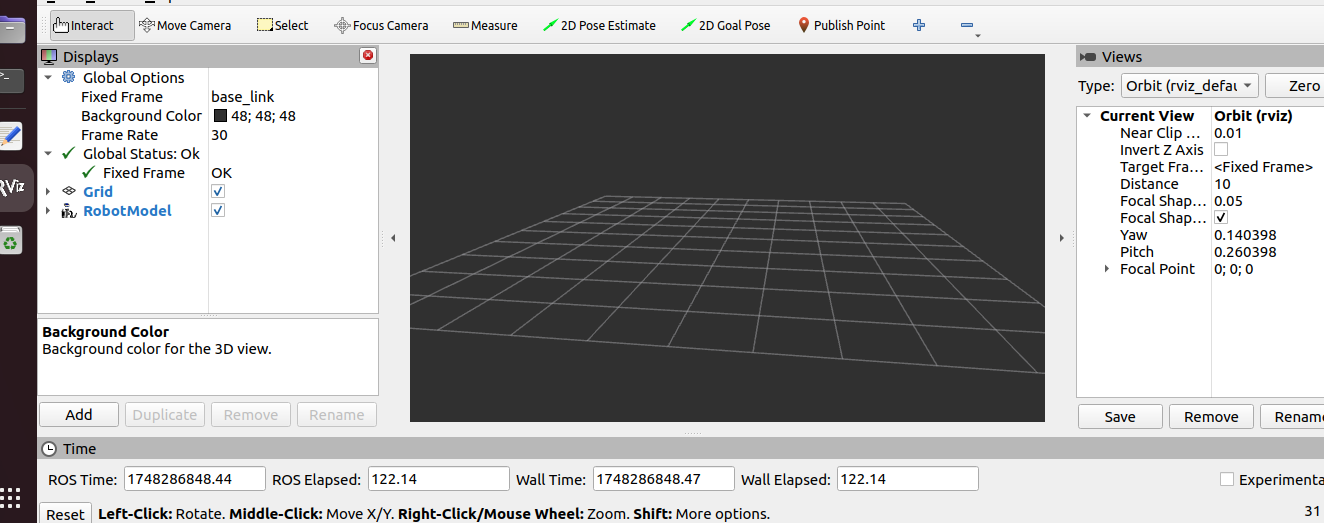




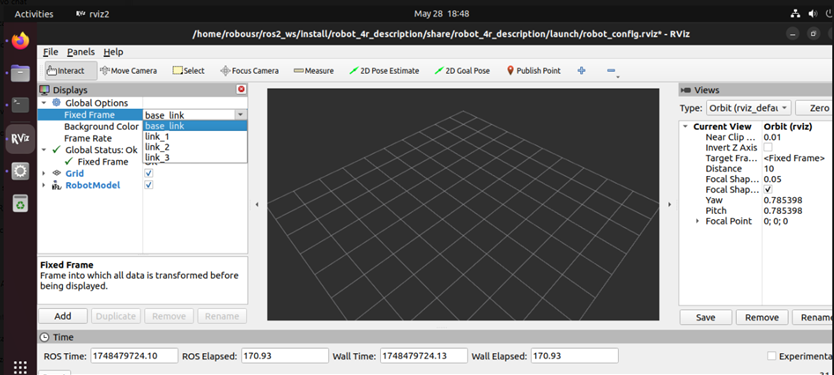

Como parte de los resultados finales de la simulación en RViz, se identificó que, a pesar de haber seguido correctamente el procedimiento de creación del paquete, configuración del archivo URDF, generación del archivo de lanzamiento y ejecución en RViz, el robot no logró visualizarse gráficamente. Este resultado contrasta con la experiencia previa en MATLAB, donde sí fue posible ver el modelo sin inconvenientes. La causa principal de esta diferencia radica en cómo cada entorno interpreta las rutas a las mallas y maneja las escalas. Mientras MATLAB es más flexible con las rutas relativas, las escalas y el manejo de archivos STL, RViz requiere una estructura de paquetes estricta y una correcta resolución de las rutas internas al paquete, además de que las mallas estén en metros. Asimismo, si las mallas tienen problemas de orientación, si el robot está fuera del rango visual, o si la cámara de RViz no está bien posicionada, el modelo simplemente no aparece.









# Conclusiones Finales

- Conclusión de **Figueroa Navarro Jürgen Alejandro**:
Este proyecto tuvo como objetivo diseñar una trayectoria para que un robot SCARA trasladara un objeto desde un punto P1 hasta un punto P2, asegurando que su índice de manipulabilidad WW se mantuviera dentro de un rango adecuado durante todo el movimiento. Este enfoque no solo consideró la posición final, sino también la eficiencia y controlabilidad del robot a lo largo de la trayectoria, lo que aportó una perspectiva más profunda y profesional al diseño de movimiento. A lo largo del desarrollo se integraron herramientas clave como ROS 2, RViz, Gazebo, MATLAB y Fusion 360, lo que permitió abordar cada fase del proceso, desde la modelación del robot hasta la simulación y análisis de desempeño. Aunque no se logró visualizar completamente el modelo en RViz, se adquirió un entendimiento sólido del flujo de trabajo requerido en un entorno de simulación realista. Uno de los principales desafíos fue adaptarse al sistema operativo Ubuntu y al uso intensivo de la terminal, experiencia que exigió iniciativa, autodisciplina, aprendizaje constante y resolución de problemas no vistos en clases. Aunque no todos los problemas se pudieron resolver, los cuales si logramos resolver se solucionaron mediante búsquedas exhaustivas de soluciones en lugares como YouTube y forums en línea.

- Conclusión de **Rabadán Granados Jesús Sebastián**:
El desarrollo de este proyecto representó un reto integral tanto en el ámbito técnico como formativo. A lo largo del proceso, se trabajó en la simulación de un robot mediante herramientas especializadas como ROS 2, RViz, Gazebo y MATLAB, partiendo desde la modelación en Fusion 360 hasta la generación de archivos URDF. Aunque no se logró visualizar completamente el modelo en RViz, se avanzó significativamente en la comprensión del flujo completo de una simulación robótica.
El informe evidencia un fuerte enfoque en la documentación del proceso, con una estructura clara que incluye hipótesis, objetivos, planteamiento del problema y resultados. La escasa cantidad de código, centrado en la descripción del modelo URDF, refuerza la idea de que el valor principal del trabajo radicó en la integración de conocimientos y la documentación del aprendizaje más que en la programación intensiva.
Uno de los principales desafíos fue adaptarse al entorno de Ubuntu y al uso de la terminal, una experiencia nueva que requirió desarrollar habilidades autodidactas para superar la curva de aprendizaje. Aunque los resultados prácticos no fueron completamente exitosos, la experiencia permitió un crecimiento notable en la autonomía, en el pensamiento técnico y en la capacidad de abordar proyectos de simulación complejos.
En resumen, este proyecto no solo reforzó conocimientos técnicos, sino que también impulsó el desarrollo de competencias clave para la ingeniería moderna, como la resolución de problemas, la autoformación y la documentación clara y estructurada del trabajo realizado.

- Conclusión de **Ortega Mejía Rodrigo**: A través de este proyecto se adquirió una visión más clara sobre los elementos esenciales que conforman la simulación de un robot manipulador en ROS 2. La construcción del modelo 4R permitió aplicar conocimientos de cinemática, estructuras de archivos URDF y herramientas de visualización como RViz, fortaleciendo la comprensión de cómo interactúan los componentes en un entorno simulado. Si bien surgieron complicaciones durante la configuración del entorno de trabajo en Ubuntu, especialmente por el uso de comandos en terminal, estas experiencias favorecieron el desarrollo de habilidades técnicas que serán útiles en proyectos futuros. En definitiva, este trabajo sirvió como un primer acercamiento práctico a la simulación robótica, destacando tanto la importancia de la perseverancia como del aprendizaje autónomo en el área de la robótica.


- Conclusión de **Santillán Sosa Gerardo**: Este proyecto representó un reto técnico y formativo, al integrar conceptos avanzados de cinemática y simulación de robots con herramientas de desarrollo como ROS 2, RViz, Gazebo y MATLAB. Si bien no se logró visualizar correctamente el modelo en RViz como se esperaba, se avanzó significativamente en la comprensión del proceso completo, desde la modelación en Fusion 360 hasta la generación de archivos URDF y el planteamiento del control de trayectoria. Trabajar en un entorno como Ubuntu fue uno de los principales desafíos durante el semestre, ya que fue la primera vez que me enfrenté a una plataforma basada en terminal, lo cual me generó confusión en varios momentos. No obstante, en este último proyecto traté de ser autodidacta, seguir los pasos por mi cuenta y mejorar mis habilidades técnicas. Aunque los resultados no fueron totalmente exitosos, el aprendizaje adquirido en cada etapa del proceso fue valioso y me permitió desarrollar una mayor autonomía y entendimiento a uno de los procesos para simular un robot.